##### The following dataset is a sample that contains patients’ information (demographics and medical data) that relates to heart disease prediction. The features are:

* Age: age of the patient [years] 
* Sex: sex of the patient [M: Male, F: Female] 
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] 
* RestingBP: resting blood pressure [mm Hg] 
* Cholesterol: serum cholesterol [mm/dl] 
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] 
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] 
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202] 
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No] 
* Oldpeak: oldpeak = ST [Numeric value measured in depression] 
* T_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] 
* HeartDisease: output class [1: heart disease, 0: Normal]

* As a data analyst, you are tasked to answer the following questions to obtain insights about the data and to conduct predictive modeling to forecast the presence of heart failure (variable HeartDisease).

In [269]:
# Importing required libraries.

import numpy as np

import pandas as pd
pd.set_option('display.max_columns',100)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [270]:
# Importing dataset of heart disease and assigning new dataframe (as original_df) to keep it original and compare it with cleaned one on later stage.

original_df=pd.read_csv('heart_disease.csv')

# Importing dataset of heart disease and assigning dataframe as 'df' for exploratory data analysis (EDA).
# Exploratory data analysis (EDA) will be used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

df=pd.read_csv('heart_disease.csv')

##  1) Exploratory data analysis

### a) Get a description, general information, data types, and shape of the dataset.

In [271]:
# examining first 5 records of the dataset 'heart'.

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [272]:
# examining last 5 records of the dataset 'heart'.

df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


 As we can see, there are several input factors that may be used to determine whether or not a person has a cardiac condition.

In [273]:
# checking the datatypes pf each variable (features) 

df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [274]:
# checking datatypes & null vales of each feature: (We dont have any null values)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [275]:
# shape and size of the dataset

print('Shape of the datset:', df.shape)
print('Dimension of the dataset:', df.ndim)
print('Size of the dataset:', df.size)

Shape of the datset: (918, 12)
Dimension of the dataset: 2
Size of the dataset: 11016


### b) Determine the frequency of distinct values for each feature in the dataset.

In [276]:
# Statistical summary of numerical data (int64 & float64).

df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [277]:
# Statistical summary of string (object) data

df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [278]:
# Categorizing the features as per the datatypes in form of list.

print('Features having int64 datatype:', df.select_dtypes(include='int64').columns.tolist())
print('Features having float64 datatype:', df.select_dtypes(include='float64').columns.tolist())
print('Features having object datatype:', df.select_dtypes(include='object').columns.tolist())

Features having int64 datatype: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'HeartDisease']
Features having float64 datatype: ['Oldpeak']
Features having object datatype: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [279]:
# printing all the names of available features of the dataframe for calculating frequency.

df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [280]:
# Determine the frequency of distinct values for each feature in the dataset. 

# defining column names (features) in the value count function one by one.
for x in df.columns: 
    
    #performing value count/frequency of each unique record
    value_counts = df[x].value_counts()
    
    # printing the column name and value count title
    print(f'{x} value counts:')
    
    #printing the calculated value counts of each unique entry
    print(value_counts)

Age value counts:
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64
Sex value counts:
M    725
F    193
Name: Sex, dtype: int64
ChestPainType value counts:
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
RestingBP value counts:
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64
Cholesterol value counts:
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Ch

### c) Plot all features in the dataset to check distribution using a histogram.

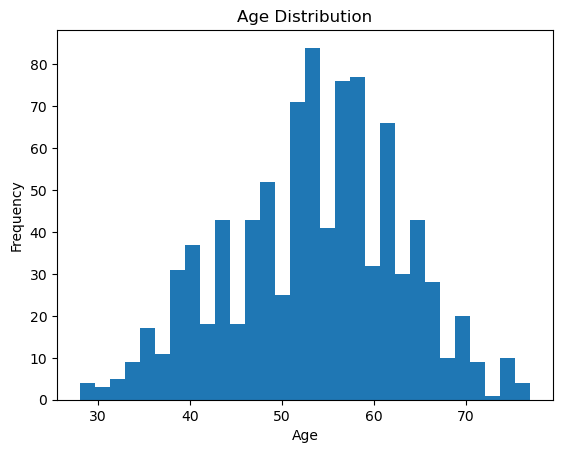

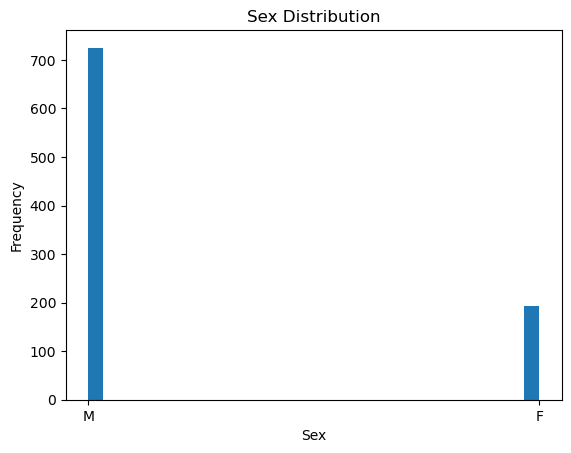

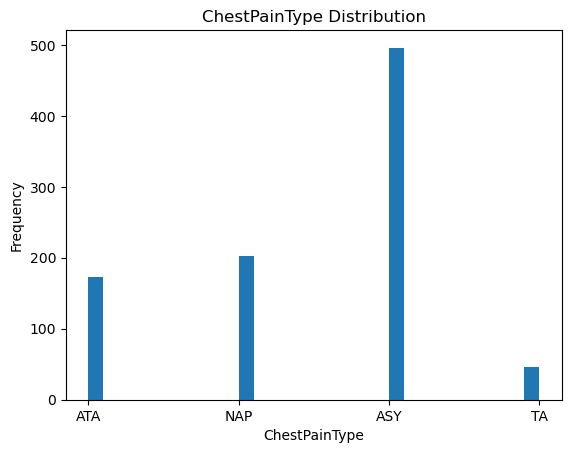

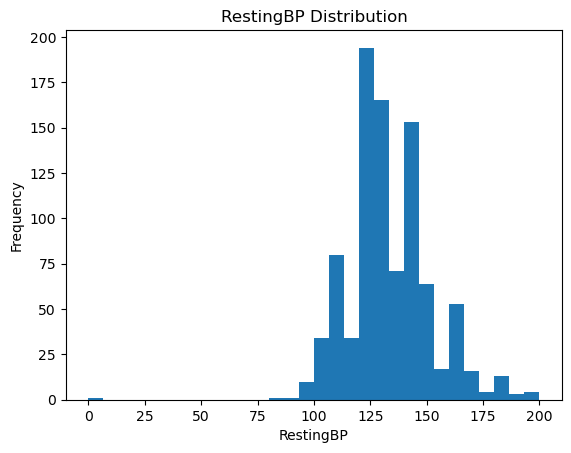

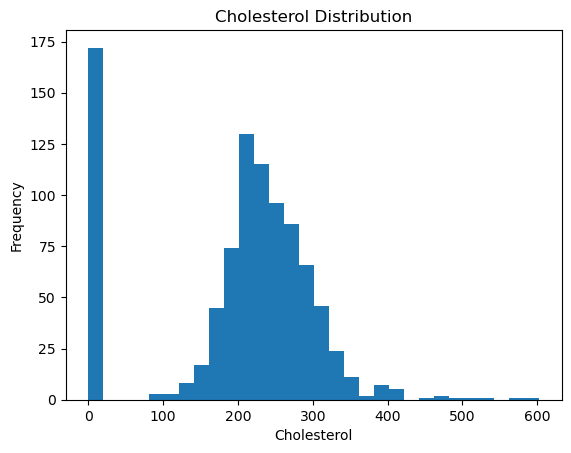

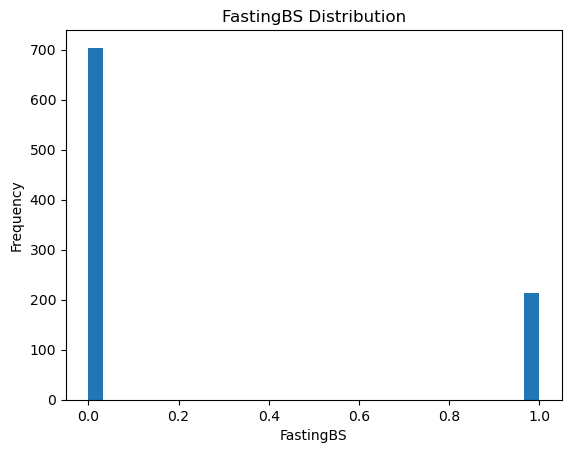

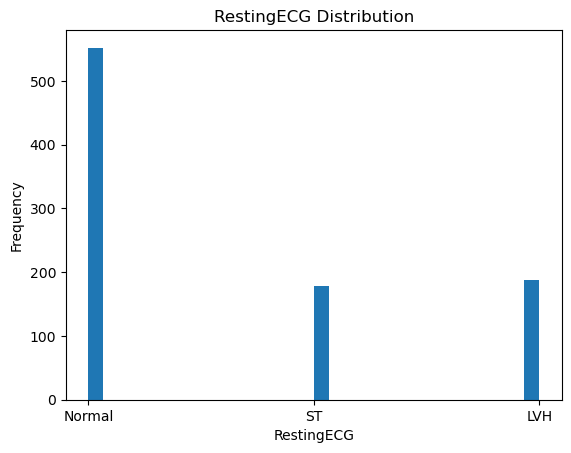

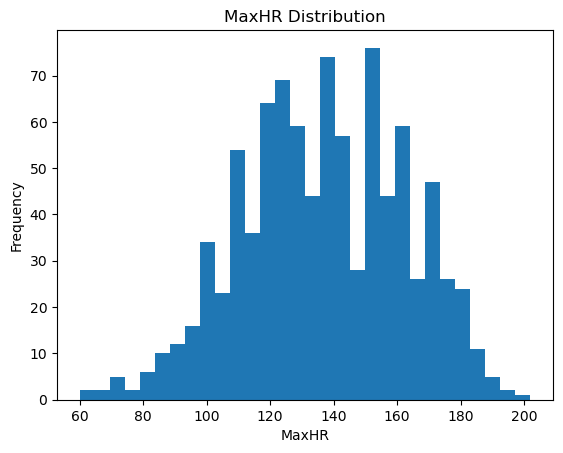

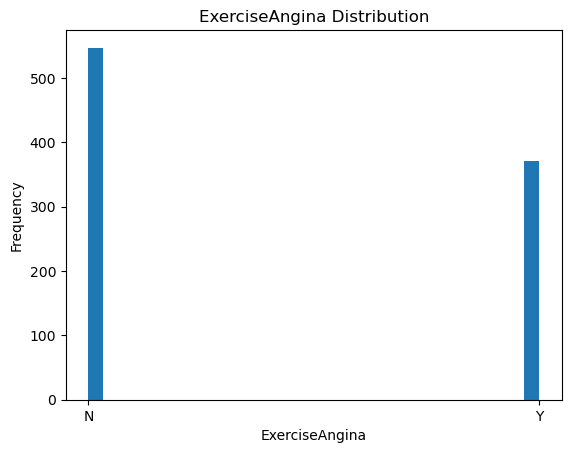

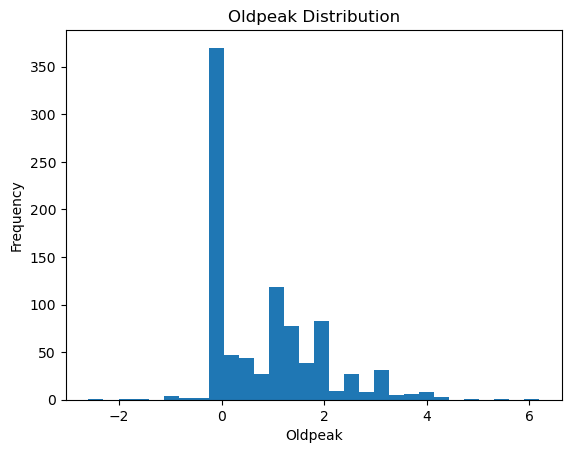

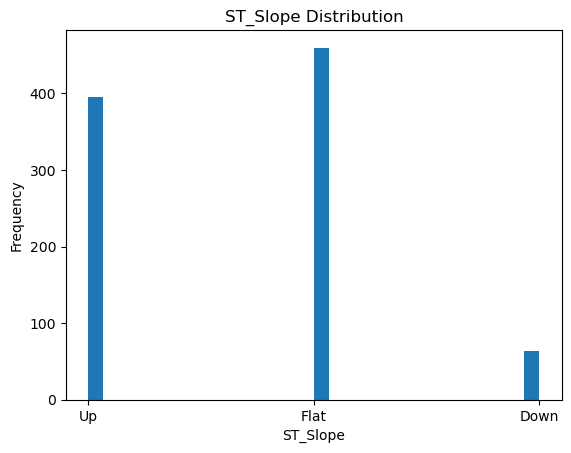

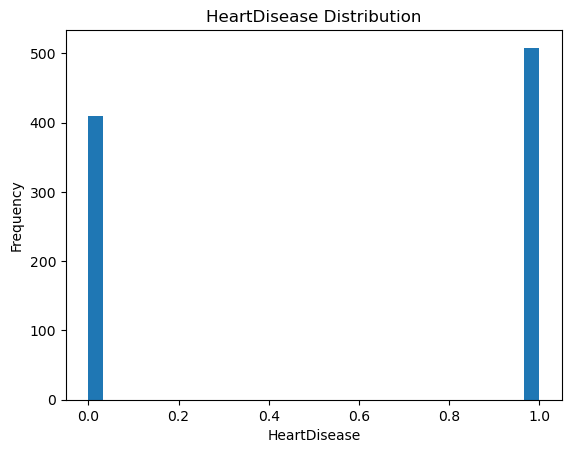

In [281]:
# Distribution using histogram for each feature.

# defining column names (features) in ploting histogram one by one.

for x in df.columns:
    plt.hist(df[x], bins=30)
    plt.title(f'{x} Distribution')
    plt.xlabel(x)
    plt.ylabel('Frequency')
    plt.show()

### 4) Use a correlation matrix to check for correlation between predictor variables and drop correlated features (> 0.5).

In [282]:
# Correlation matrix of all participating numerical features.

corr_matrix = df.corr().abs()
corr_matrix

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,0.095282,0.198039,0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,0.112135,0.164803,0.107589
Cholesterol,0.095282,0.100893,1.000000,0.260974,0.235792,0.050148,0.232741
FastingBS,0.198039,0.070193,0.260974,1.000000,0.131438,0.052698,0.267291
MaxHR,0.382045,0.112135,0.235792,0.131438,1.000000,0.160691,0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,0.232741,0.267291,0.400421,0.403951,1.000000


<AxesSubplot:>

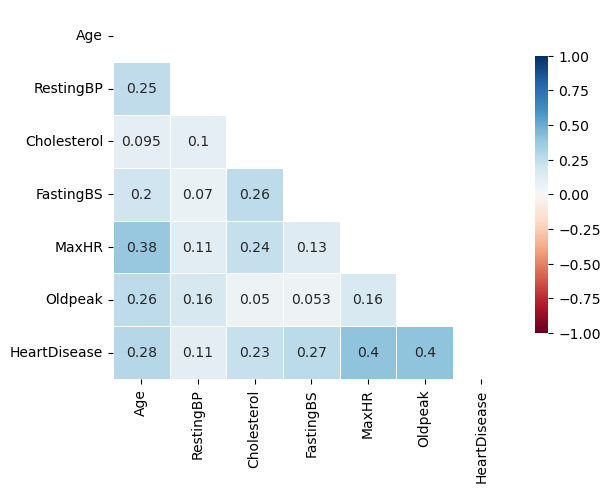

In [283]:
# Heatmap representation of Correlation matrix.

# 'np.ones_like(corr, dtype=bool)' creates a 2D boolean array of the same shape as the corr array, which is assumed to be a 2D correlation matrix.
#  The 'dtype=bool' argument specifies that the array should contain boolean values.
# 'np.triu' then returns the upper triangle of this boolean array.


mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(corr_matrix, cmap="RdBu", mask=mask, vmax=1.0, vmin=-1.0, center=0, annot=True, linewidths=.5, cbar_kws={"shrink": 0.75})



In [284]:
# Selecting the upper traingle of the correlation matrix.

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Finding the values of correlation greater that 0.5 and fitting them in 'to_drop'

to_drop = [col for col in upper.columns if any(upper[col] > 0.5)]

In [285]:
# checking the features which will be drop

to_drop

[]

In [286]:
# Updating the dataframe by droping the about features having correlation greater than 0.5 
df = df.drop(to_drop, axis=1)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## 2) Feature Engineering

### a) Check and drop duplicate and missing values, if it’s the case. 

In [287]:
# Checking the duplicate values.

dup_values = df.duplicated().sum()
print(f"Number of duplicate rows: {dup_values}")

Number of duplicate rows: 0


In [288]:
# Checking the missing values.

missing_values = df.isnull().sum()
print(missing_values)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


### b) Check and manage imbalance class, if needed.

In [289]:
# checking the imbalance class for features:

classes = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope','HeartDisease']

for x in classes:
    value_counts = df[x].value_counts()
    
    print(f'{x} value counts:')
    
    print(value_counts)

Sex value counts:
M    725
F    193
Name: Sex, dtype: int64
ChestPainType value counts:
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
RestingECG value counts:
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
ExerciseAngina value counts:
N    547
Y    371
Name: ExerciseAngina, dtype: int64
ST_Slope value counts:
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
HeartDisease value counts:
1    508
0    410
Name: HeartDisease, dtype: int64


In [290]:
# checking the imbalance class for label:

df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

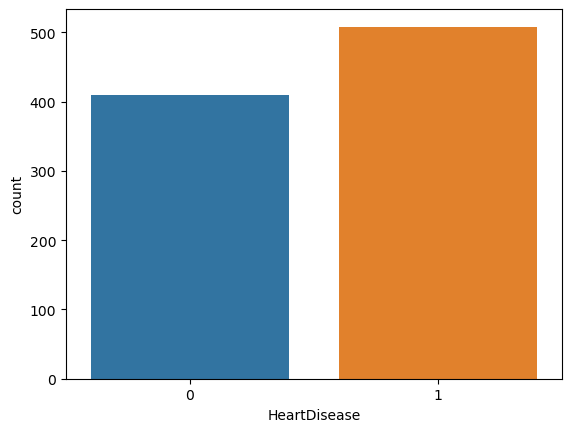

In [291]:
# Graphical representation of outputs of class:

sns.countplot(df.HeartDisease)

The dataset is not imbalanced as the labels are almost in equal proportion.

### c) Check (Use boxplots) and take care of outliers (e.g. Cholesterol, Oldpeak) by completing imputation.

In [292]:
# boxplot representation of numerical features.

numeric_features = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']

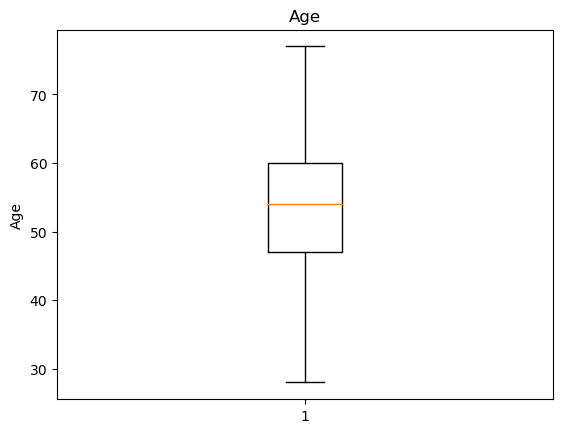

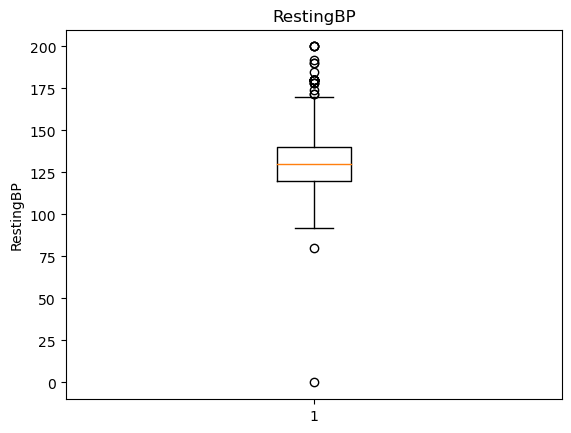

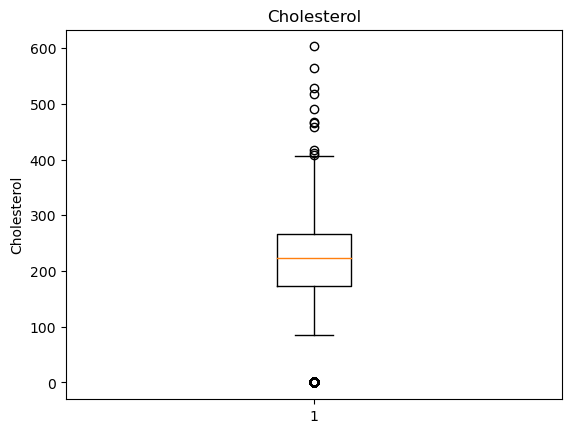

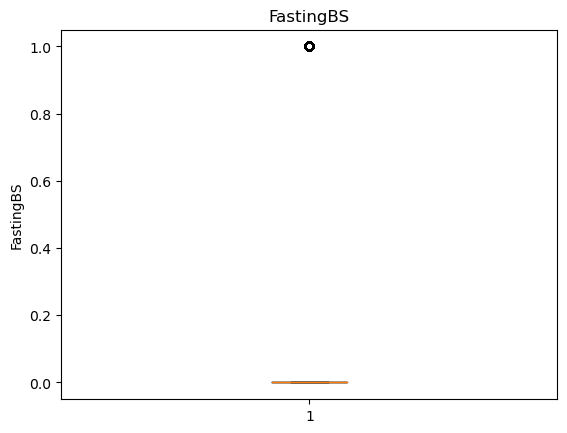

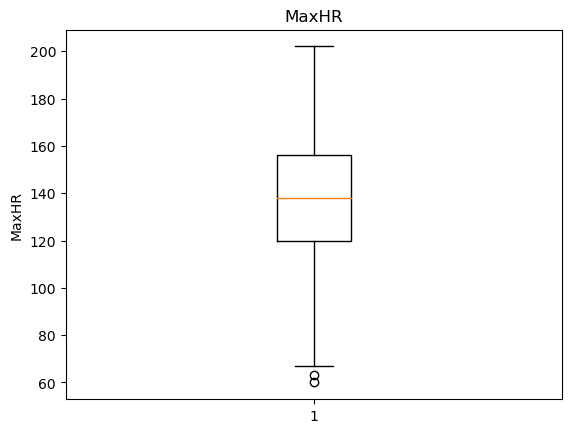

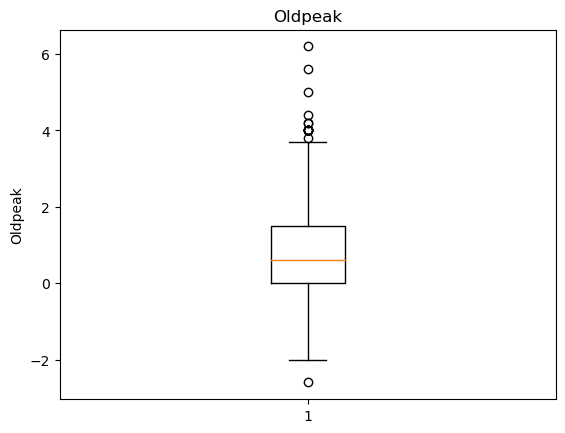

In [295]:
for x in numeric_features:
    plt.boxplot(df[x])
    plt.title(x)
    plt.ylabel(x)
    plt.show()

Text(0.5, 1.0, 'Outliers')

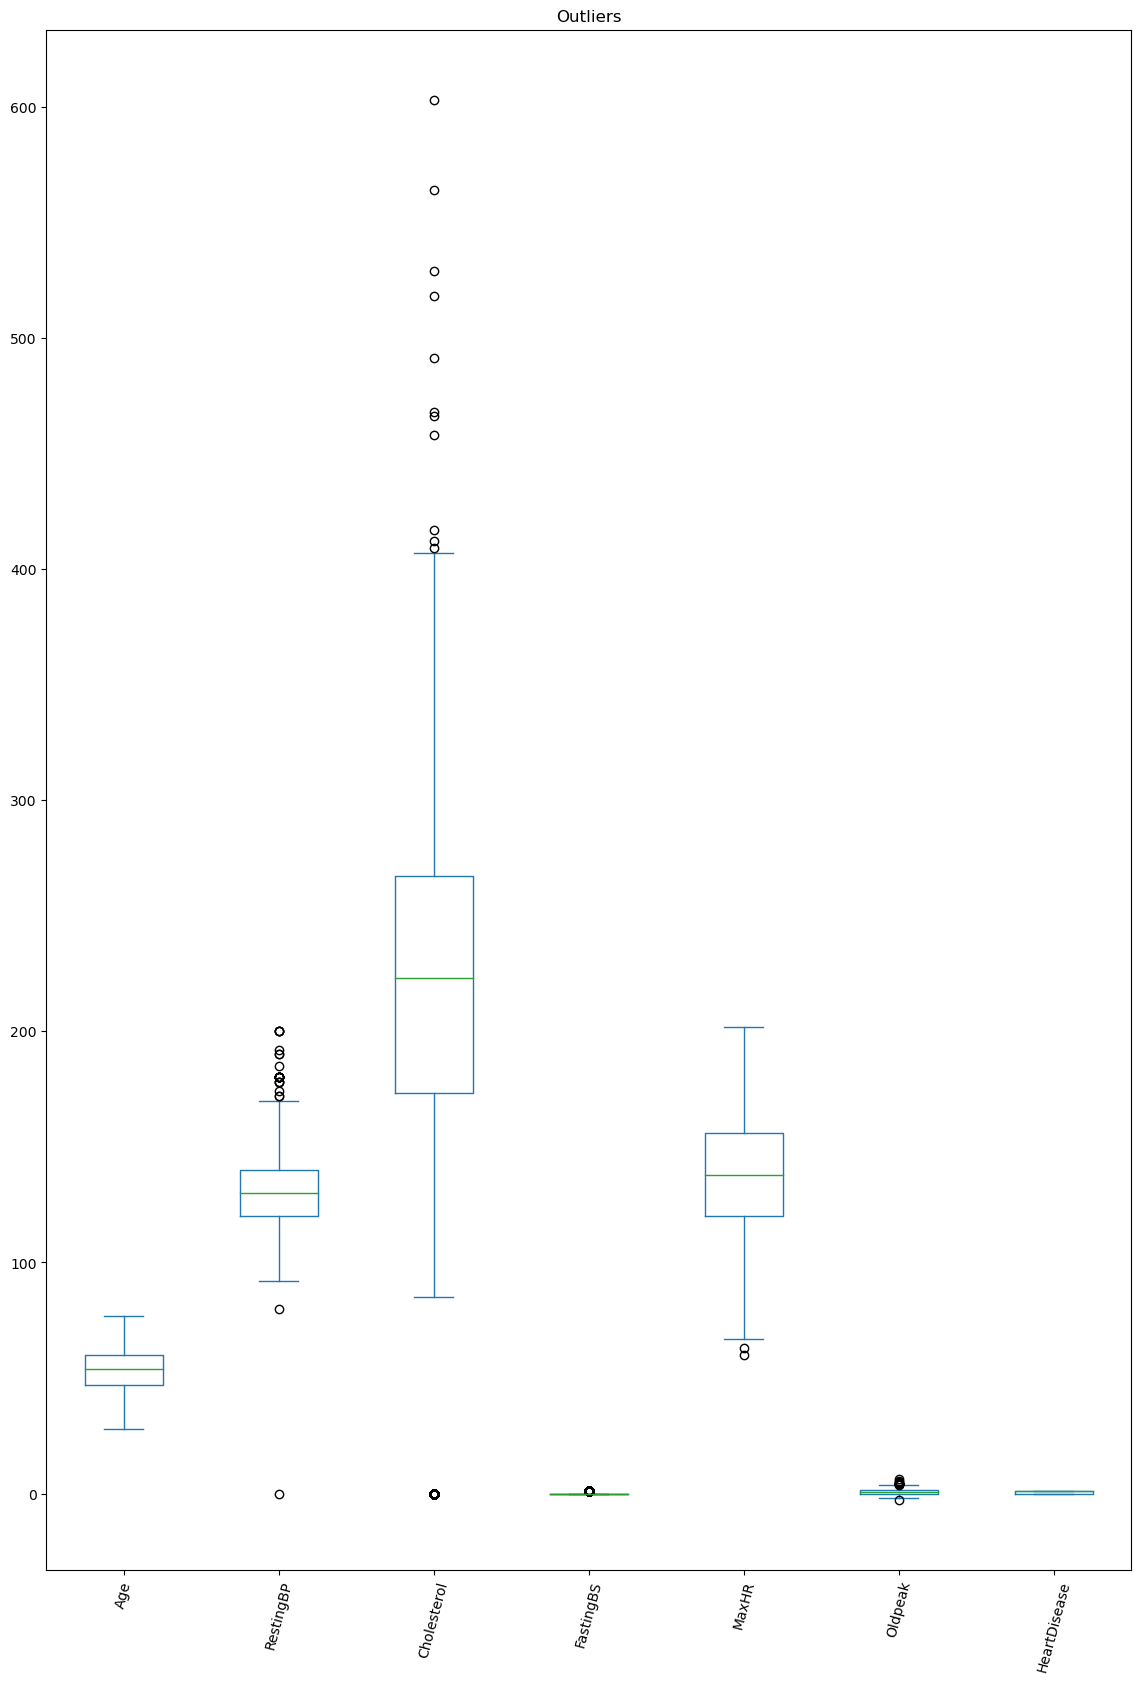

In [296]:
# Outliers in one chart

df.plot(kind='box',figsize=(14,20))
plt.xticks(rotation=75)
plt.title('Outliers')

In [297]:
# Replacing outliers with value 0 by median values

df['Cholesterol'].replace(0, df['Cholesterol'].median(),inplace=True)

In [298]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,240.581699,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,53.982967,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [299]:
median = df["Cholesterol"].median()
print(median)

223.0


In [300]:
# Replacing outliers by median values

df.loc[outliers,"Cholesterol"]=median

In [318]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ExerciseAngina_Y,ChestPainType_LE
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,131.079521,239.957516,0.233115,136.976035,0.829412,0.553377,0.789760,0.404139,0.781046
std,9.432617,15.597206,53.491358,0.423046,25.215656,0.958009,0.497414,0.407701,0.490992,0.956519
min,28.000000,92.000000,85.000000,0.000000,67.000000,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,214.250000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,1.000000,0.000000,0.000000
75%,60.000000,140.000000,265.000000,0.000000,156.000000,1.500000,1.000000,1.000000,1.000000,2.000000
max,77.000000,170.000000,603.000000,1.000000,202.000000,3.700000,1.000000,1.000000,1.000000,3.000000


In [321]:
Q1 = df['RestingBP'].quantile(0.25)
Q3 = df['RestingBP'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df['RestingBP'] < (Q1 - 1.5 * IQR)) | (df['RestingBP'] > (Q3 + 1.5 * IQR)))

In [322]:
median = df['RestingBP'].median()
print(median)

130.0


In [323]:
# Replacing outliers by median values

df.loc[outliers,'RestingBP']=median

In [324]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ExerciseAngina_Y,ChestPainType_LE
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,131.079521,239.957516,0.233115,136.976035,0.829412,0.553377,0.789760,0.404139,0.781046
std,9.432617,15.597206,53.491358,0.423046,25.215656,0.958009,0.497414,0.407701,0.490992,0.956519
min,28.000000,92.000000,85.000000,0.000000,67.000000,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,214.250000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,1.000000,0.000000,0.000000
75%,60.000000,140.000000,265.000000,0.000000,156.000000,1.500000,1.000000,1.000000,1.000000,2.000000
max,77.000000,170.000000,603.000000,1.000000,202.000000,3.700000,1.000000,1.000000,1.000000,3.000000


In [325]:
Q1 = df['MaxHR'].quantile(0.25)
Q3 = df['MaxHR'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df['MaxHR'] < (Q1 - 1.5 * IQR)) | (df['MaxHR'] > (Q3 + 1.5 * IQR)))

In [326]:
# Replacing outliers by median values

median = df['MaxHR'].median()
print(median)

138.0


In [328]:
# Replacing outliers by median values

df.loc[outliers,'MaxHR']=median

In [329]:
Q1 = df['Oldpeak'].quantile(0.25)
Q3 = df['Oldpeak'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df['Oldpeak'] < (Q1 - 1.5 * IQR)) | (df['Oldpeak'] > (Q3 + 1.5 * IQR)))

In [330]:
median = df['Oldpeak'].median()
print(median)

0.6


In [331]:
# Replacing outliers by median values

df.loc[outliers,'Oldpeak']=median

In [312]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

Text(0.5, 1.0, 'Outliers')

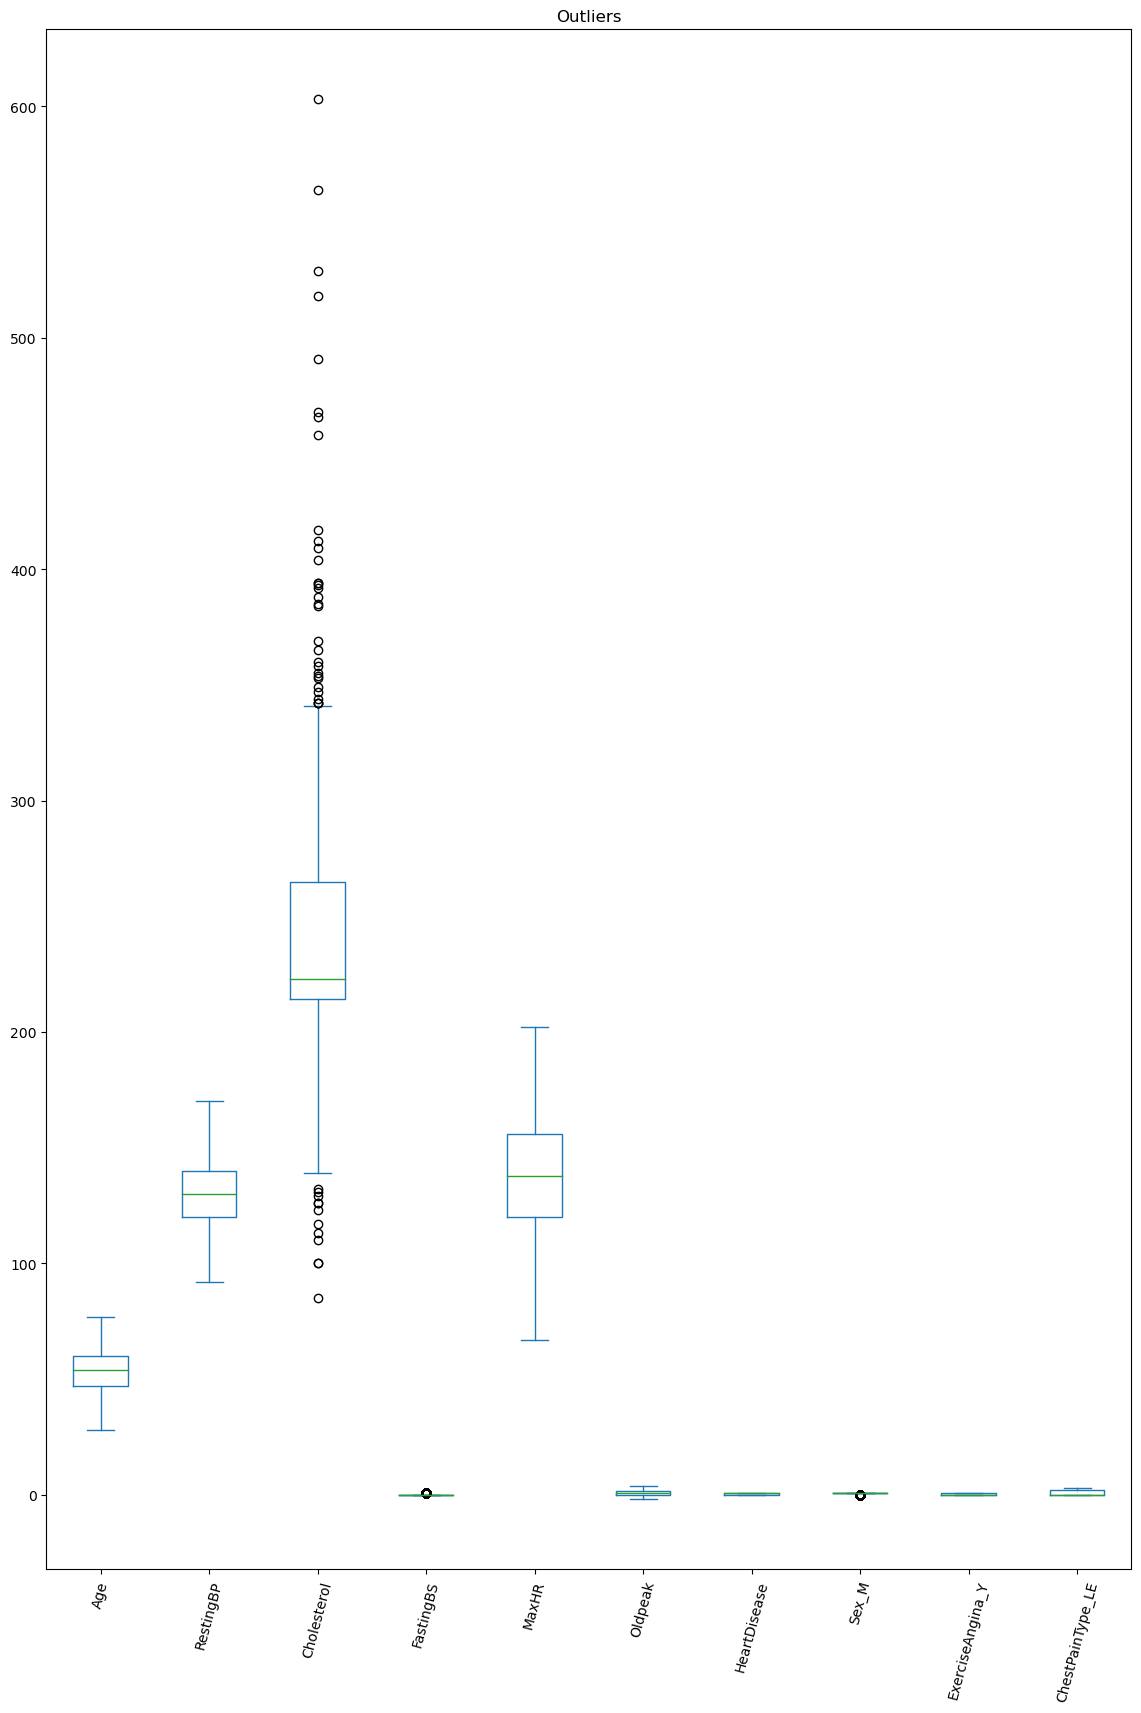

In [332]:
#plotting box plot after converting outliers to median values

df.plot(kind='box',figsize=(14,20))
plt.xticks(rotation=75)
plt.title('Outliers')

### d) Convert categorical data into numerical data using one-hot encoding or any other label encoding approach. 

In [314]:
# One-hot encoding to convert the Sex feature to binary format

df_onehot = pd.get_dummies(df["Sex"], prefix="Sex")

# Adding the new features with binary variables to the original dataframe & removing original feature

df = pd.concat([df, df_onehot], axis=1)
df.drop(columns='Sex', inplace=True)

# Removing one column (out of 2) from the sex feature, as it is binary and one column can define it.

df.drop(columns='Sex_F', inplace=True)
df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,1
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,1


In [315]:
# One-hot encoding to convert the ExerciseAngina feature to binary format.

df_onehot = pd.get_dummies(df["ExerciseAngina"], prefix="ExerciseAngina")


# Adding the new features with binary variables to the original dataframe & removing original feature

df = pd.concat([df, df_onehot], axis=1)
df.drop(columns='ExerciseAngina', inplace=True)


# Removing one column (out of 2) from the sex feature, as it is binary and one column can define it.

df.drop(columns='ExerciseAngina_N', inplace=True)
df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_M,ExerciseAngina_Y
0,40,ATA,140,289,0,Normal,172,0.0,Up,0,1,0
1,49,NAP,160,180,0,Normal,156,1.0,Flat,1,0,0
2,37,ATA,130,283,0,ST,98,0.0,Up,0,1,0
3,48,ASY,138,214,0,Normal,108,1.5,Flat,1,0,1
4,54,NAP,150,195,0,Normal,122,0.0,Up,0,1,0


In [316]:
# importing label encoder for label encoding of categorical data with more than 2 categories.

from sklearn.preprocessing import LabelEncoder


# create an instance of the label encoding

le = LabelEncoder()

In [317]:
# Assigning label encoded feature and dropping original feature (ChestPainType)

df["ChestPainType_LE"] = le.fit_transform(df["ChestPainType"])
df.drop(columns='ChestPainType', inplace=True)

df.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_M,ExerciseAngina_Y,ChestPainType_LE
0,40,140,289,0,Normal,172,0.0,Up,0,1,0,1
1,49,160,180,0,Normal,156,1.0,Flat,1,0,0,2
2,37,130,283,0,ST,98,0.0,Up,0,1,0,1
3,48,138,214,0,Normal,108,1.5,Flat,1,0,1,0
4,54,150,195,0,Normal,122,0.0,Up,0,1,0,2


In [203]:
# Print the original categories of label encoded feature and their encoded values (ChestPainType)

print("Categories and Encoded Values: ")
for i, category in enumerate(le.classes_):
    print(category, ":", i)

Categories and Encoded Values: 
ASY : 0
ATA : 1
NAP : 2
TA : 3


In [204]:
# Assigning label encoded feature and dropping original feature (RestingECG)

df["RestingECG_LE"] = le.fit_transform(df["RestingECG"])
df.drop(columns='RestingECG', inplace=True)

df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_M,ExerciseAngina_Y,ChestPainType_LE,RestingECG_LE
0,40,140,289,0,172,0.0,Up,0,1,0,1,1
1,49,160,180,0,156,1.0,Flat,1,0,0,2,1
2,37,130,283,0,98,0.0,Up,0,1,0,1,2
3,48,138,214,0,108,1.5,Flat,1,0,1,0,1
4,54,150,195,0,122,0.0,Up,0,1,0,2,1


In [205]:
# Print the original categories of label encoded feature and their encoded values (RestingECG)

print("Categories and Encoded Values: ")
for i, category in enumerate(le.classes_):
    print(category, ":", i)

Categories and Encoded Values: 
LVH : 0
Normal : 1
ST : 2


In [206]:
# Assigning label encoded feature and dropping original feature (ST_Slope)

df["ST_Slope_LE"] = le.fit_transform(df["ST_Slope"])
df.drop(columns='ST_Slope', inplace=True)

df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ExerciseAngina_Y,ChestPainType_LE,RestingECG_LE,ST_Slope_LE
0,40,140,289,0,172,0.0,0,1,0,1,1,2
1,49,160,180,0,156,1.0,1,0,0,2,1,1
2,37,130,283,0,98,0.0,0,1,0,1,2,2
3,48,138,214,0,108,1.5,1,0,1,0,1,1
4,54,150,195,0,122,0.0,0,1,0,2,1,2


In [207]:
# Print the original categories of label encoded feature and their encoded values (ST_Slope)

print("Categories and Encoded Values: ")
for i, category in enumerate(le.classes_):
    print(category, ":", i)

Categories and Encoded Values: 
Down : 0
Flat : 1
Up : 2


### e) Rescale features to a narrow range using a normalization or standardization function

In [208]:
# Importing Mix-Max Scaler to scale features in a dataset to a given range.

from sklearn.preprocessing import MinMaxScaler


# create an instance of the MinMaxScaler object

scaler = MinMaxScaler()

In [209]:
# Implementing rescaling to generate new scaled numerical feature and dropping original numerical feature (MaxHR)

# defining the feature to be rescaled and fit to transform

M = df[['MaxHR']]
df['MaxHR_scaled']= scaler.fit_transform(M)


#dropping the original feature

df.drop(columns='MaxHR', inplace=True)

df.head()

,Age,RestingBP,Cholesterol,FastingBS,Oldpeak,HeartDisease,Sex_M,ExerciseAngina_Y,ChestPainType_LE,RestingECG_LE,ST_Slope_LE,MaxHR_scaled
0,40,140,289,0,0.0,0,1,0,1,1,2,0.777778
1,49,160,180,0,1.0,1,0,0,2,1,1,0.659259
2,37,130,283,0,0.0,0,1,0,1,2,2,0.229630
3,48,138,214,0,1.5,1,0,1,0,1,1,0.303704
4,54,150,195,0,0.0,0,1,0,2,1,2,0.407407


In [210]:
# Implementing rescaling to generate new scaled numerical feature and dropping original numerical feature (Cholesterol)

# defining the feature to be rescaled and fit to transform

C = df[['Cholesterol']]
df['Cholesterol_scaled']= scaler.fit_transform(C)
df.drop(columns='Cholesterol', inplace=True)

df.head()

,Age,RestingBP,FastingBS,Oldpeak,HeartDisease,Sex_M,ExerciseAngina_Y,ChestPainType_LE,RestingECG_LE,ST_Slope_LE,MaxHR_scaled,Cholesterol_scaled
0,40,140,0,0.0,0,1,0,1,1,2,0.777778,0.633540
1,49,160,0,1.0,1,0,0,2,1,1,0.659259,0.295031
2,37,130,0,0.0,0,1,0,1,2,2,0.229630,0.614907
3,48,138,0,1.5,1,0,1,0,1,1,0.303704,0.400621
4,54,150,0,0.0,0,1,0,2,1,2,0.407407,0.341615


In [211]:
# Implementing rescaling to generate new scaled numerical feature and dropping original numerical feature (RestingBP)

# defining the feature to be rescaled and fit to transform

R = df[['RestingBP']]
df['RestingBP_scaled']= scaler.fit_transform(R)
df.drop(columns='RestingBP', inplace=True)

df.head()

,Age,FastingBS,Oldpeak,HeartDisease,Sex_M,ExerciseAngina_Y,ChestPainType_LE,RestingECG_LE,ST_Slope_LE,MaxHR_scaled,Cholesterol_scaled,RestingBP_scaled
0,40,0,0.0,0,1,0,1,1,2,0.777778,0.633540,0.615385
1,49,0,1.0,1,0,0,2,1,1,0.659259,0.295031,0.871795
2,37,0,0.0,0,1,0,1,2,2,0.229630,0.614907,0.487179
3,48,0,1.5,1,0,1,0,1,1,0.303704,0.400621,0.589744
4,54,0,0.0,0,1,0,2,1,2,0.407407,0.341615,0.743590


In [212]:
# Implementing rescaling to generate new scaled numerical feature and dropping original numerical feature (Age)

# defining the feature to be rescaled and fit to transform

A = df[['Age']]
df['Age_scaled']= scaler.fit_transform(A)
df.drop(columns='Age', inplace=True)

df.head()

,FastingBS,Oldpeak,HeartDisease,Sex_M,ExerciseAngina_Y,ChestPainType_LE,RestingECG_LE,ST_Slope_LE,MaxHR_scaled,Cholesterol_scaled,RestingBP_scaled,Age_scaled
0,0,0.0,0,1,0,1,1,2,0.777778,0.633540,0.615385,0.244898
1,0,1.0,1,0,0,2,1,1,0.659259,0.295031,0.871795,0.428571
2,0,0.0,0,1,0,1,2,2,0.229630,0.614907,0.487179,0.183673
3,0,1.5,1,0,1,0,1,1,0.303704,0.400621,0.589744,0.408163
4,0,0.0,0,1,0,2,1,2,0.407407,0.341615,0.743590,0.530612


In [213]:
# Implementing rescaling to generate new scaled numerical feature and dropping original numerical feature (Oldpeak)

# defining the feature to be rescaled and fit to transform

O = df[['Oldpeak']]
df['Oldpeak_scaled']= scaler.fit_transform(O)
df.drop(columns='Oldpeak', inplace=True)

df.head()

,FastingBS,HeartDisease,Sex_M,ExerciseAngina_Y,ChestPainType_LE,RestingECG_LE,ST_Slope_LE,MaxHR_scaled,Cholesterol_scaled,RestingBP_scaled,Age_scaled,Oldpeak_scaled
0,0,0,1,0,1,1,2,0.777778,0.633540,0.615385,0.244898,0.350877
1,0,1,0,0,2,1,1,0.659259,0.295031,0.871795,0.428571,0.526316
2,0,0,1,0,1,2,2,0.229630,0.614907,0.487179,0.183673,0.350877
3,0,1,0,1,0,1,1,0.303704,0.400621,0.589744,0.408163,0.614035
4,0,0,1,0,2,1,2,0.407407,0.341615,0.743590,0.530612,0.350877


# 3)  Modeling 

### a) Partition your data in test (30%) and training (70%). 

In [214]:
# import module train test split

from sklearn.model_selection import train_test_split

In [215]:
# assigning input features in x

x=df.drop(columns='HeartDisease')

# assigning output label in y

y=df[['HeartDisease']]

In [245]:
# partitioning or spliting the data into training (70%) and testing sets(30%)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=80)

In [246]:
# checking the split and assigned features & label

x_train.info()
y_train.info()

x_test.info()
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 209 to 175
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FastingBS           642 non-null    int64  
 1   Sex_M               642 non-null    uint8  
 2   ExerciseAngina_Y    642 non-null    uint8  
 3   ChestPainType_LE    642 non-null    int32  
 4   RestingECG_LE       642 non-null    int32  
 5   ST_Slope_LE         642 non-null    int32  
 6   MaxHR_scaled        642 non-null    float64
 7   Cholesterol_scaled  642 non-null    float64
 8   RestingBP_scaled    642 non-null    float64
 9   Age_scaled          642 non-null    float64
 10  Oldpeak_scaled      642 non-null    float64
dtypes: float64(5), int32(3), int64(1), uint8(2)
memory usage: 43.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 209 to 175
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  ---

### b) Use KNN, SVM, and Decision Tree Classifier classifiers to predict the class.

In [247]:
# importing libraries of specified classifiers to predict the class.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [248]:
# create an instance of the K-Nearest Neighbors (KNN) classifier
KNN = KNeighborsClassifier()

# fitting the training features & label to train the KNN model
KNN.fit(x_train, y_train)

# After training the model on training set, predicting the label on testing features.
y_pred_KNN = KNN.predict(x_test)

In [249]:
# create an instance of the Support Vector Machine (SVM) classifier
SVM = SVC(kernel='linear')

# fitting the training features & label to train the SVM model
SVM.fit(x_train, y_train)

# After training the model on training set, predicting the label on testing features.
y_pred_SVM = SVM.predict(x_test)

In [250]:
# create an instance of the Decision Tree (DT) classifier
DTC = DecisionTreeClassifier()

# fitting the training features & label to train the DTC model
DTC.fit(x_train, y_train)

# After training the model on training set, predicting the label on testing features.
y_pred_DTC = DTC.predict(x_test)

In [251]:
# if we want to evaluate the models on the testing data, we can

from sklearn import metrics

print("KNN accuracy:", metrics.accuracy_score(y_test, y_pred_KNN ))
print("SVM accuracy:", metrics.accuracy_score(y_test, y_pred_SVM ))
print("Decision Tree accuracy:", metrics.accuracy_score(y_test, y_pred_DTC))

KNN accuracy: 0.8369565217391305
SVM accuracy: 0.8514492753623188
Decision Tree accuracy: 0.8043478260869565


# 4) Model evaluation and Selection

### a) Using the function GridSearchCV find the best estimators (criterion, max_depth, min_samples_leaf) for your DT model.

In [252]:
#importing gridsearchCV function to obtain the best possible model performance.
from sklearn.model_selection import GridSearchCV

In [253]:
# Define the parameter grid for DT model

param_grid = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'criterion': ['gini', 'entropy']
}

In [254]:
# Perform grid search cross-validation

grid_search = GridSearchCV(estimator=DTC, param_grid=param_grid, cv=10)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6]})

In [255]:
# Print the best parameters and corresponding score

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}
Best score:  0.8225


### b) Using the best parameters for the DT run the model and get the prediction

In [256]:
# Define the decision tree classifier with best parameters
DTC_best =  DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, criterion='gini')

# Train the model on the training data with best parameter
DTC_best.fit(x_train, y_train)

# Use the model to make predictions on new data
y_pred_DTC_best = DTC_best.predict(x_test)

In [257]:
# importing confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_DTC_best)

array([[102,  26],
       [ 12, 136]], dtype=int64)

### c) Compare the results of the models based on the metrics: precision, recall, accuracy, F-measure from steps 3.b and 4.b.

In [258]:
# importing fucntions for evaluating the performance of classification models.

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [259]:
# Calculating the evaluation metrics for each model

# KNN model

KNN_precision = precision_score(y_test, y_pred_KNN, average='macro')
KNN_recall = recall_score(y_test, y_pred_KNN, average='macro')
KNN_accuracy = accuracy_score(y_test, y_pred_KNN)
KNN_f1_score = f1_score(y_test, y_pred_KNN, average='macro')

# SVM model

SVM_precision = precision_score(y_test, y_pred_SVM, average='macro')
SVM_recall = recall_score(y_test, y_pred_SVM, average='macro')
SVM_accuracy = accuracy_score(y_test, y_pred_SVM)
SVM_f1_score = f1_score(y_test, y_pred_SVM, average='macro')

# DT model

DTC_precision = precision_score(y_test, y_pred_DTC, average='macro')
DTC_recall = recall_score(y_test, y_pred_DTC, average='macro')
DTC_accuracy = accuracy_score(y_test, y_pred_DTC)
DTC_f1_score = f1_score(y_test, y_pred_DTC, average='macro')


#DT model with best parameters

DTC_PM_precision = precision_score(y_test, y_pred_DTC_best, average='macro')
DTC_PM_recall = recall_score(y_test, y_pred_DTC_best, average='macro')
DTC_PM_accuracy = accuracy_score(y_test, y_pred_DTC_best)
DTC_PM_f1_score = f1_score(y_test, y_pred_DTC_best, average='macro')

In [260]:
# printing the evaluation metrics of all model

#KNN

print('K-Nearest Neighbors (KNN) classifier:')
print('  Precision: {:.3f}'.format(KNN_precision))
print('  Recall: {:.3f}'.format(KNN_recall))
print('  Accuracy: {:.3f}'.format(KNN_accuracy))
print('  F1-score: {:.3f}'.format(KNN_f1_score))

#SVM

print('Support Vector Machine (SVM) classifier:')
print('  Precision: {:.3f}'.format(SVM_precision))
print('  Recall: {:.3f}'.format(SVM_recall))
print('  Accuracy: {:.3f}'.format(SVM_accuracy))
print('  F1-score: {:.3f}'.format(SVM_f1_score))

#DT 
print('Decision Tree (DT) classifier:')
print('  Precision: {:.3f}'.format(DTC_precision))
print('  Recall: {:.3f}'.format(DTC_recall))
print('  Accuracy: {:.3f}'.format(DTC_accuracy))
print('  F1-score: {:.3f}'.format(DTC_f1_score))

#DT with best parameters
print('Decision Tree (DT) classifier with best parameters:')
print('  Precision: {:.3f}'.format(DTC_PM_precision))
print('  Recall: {:.3f}'.format(DTC_PM_recall))
print('  Accuracy: {:.3f}'.format(DTC_PM_accuracy))
print('  F1-score: {:.3f}'.format(DTC_PM_f1_score))

K-Nearest Neighbors (KNN) classifier:
  Precision: 0.842
  Recall: 0.832
  Accuracy: 0.837
  F1-score: 0.834
Support Vector Machine (SVM) classifier:
  Precision: 0.852
  Recall: 0.849
  Accuracy: 0.851
  F1-score: 0.850
Decision Tree (DT) classifier:
  Precision: 0.804
  Recall: 0.805
  Accuracy: 0.804
  F1-score: 0.804
Decision Tree (DT) classifier with best parameters:
  Precision: 0.867
  Recall: 0.858
  Accuracy: 0.862
  F1-score: 0.860


##### The best results are achieved by KNN model followed by SVM and least is by DT

### d) Plot the ROC graph for each model and compare the performance for each one 

In [261]:
# importing functions to evaluate the performance of binary classification models using Receiver Operating Characteristic (ROC) curves.

from sklearn.metrics import roc_curve, roc_auc_score

In [262]:
# Compute the ROC curve and AUC score for each model

KNN_fpr, KNN_tpr, KNN_thresholds = roc_curve(y_test, y_pred_KNN)
SVM_fpr, SVM_tpr, SVM_thresholds = roc_curve(y_test, y_pred_SVM)
DTC_fpr, DTC_tpr, DTC_thresholds = roc_curve(y_test, y_pred_DTC)
DTC_PM_fpr, DTC_PM_tpr, DTC_PM_thresholds = roc_curve(y_test, y_pred_DTC_best)

In [263]:
# calculate the AUC score for each model

KNN_auc = roc_auc_score(y_test, y_pred_KNN)
SVM_auc = roc_auc_score(y_test, y_pred_SVM)
DTC_auc = roc_auc_score(y_test, y_pred_DTC)
DTC_PM_auc = roc_auc_score(y_test, y_pred_DTC_best)

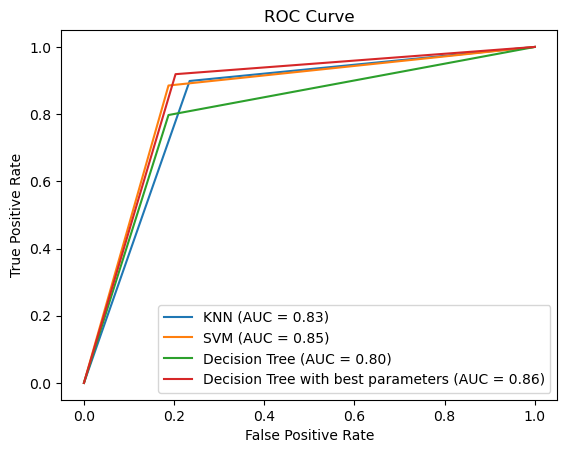

In [264]:
# plot the ROC curve for each model

plt.plot(KNN_fpr, KNN_tpr, label=f'KNN (AUC = {KNN_auc:.2f})')
plt.plot(SVM_fpr, SVM_tpr, label=f'SVM (AUC = {SVM_auc:.2f})')
plt.plot(DTC_fpr, DTC_tpr, label=f'Decision Tree (AUC = {DTC_auc:.2f})')
plt.plot(DTC_PM_fpr, DTC_PM_tpr, label=f'Decision Tree with best parameters (AUC = {DTC_PM_auc:.2f})')

# add labels and legend to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# show the plot
plt.show()


##### Observation from  based on the metrics: precision, recall, accuracy, F-measure.

Based on precision, recall, accuracy, F-measure SVM is having highest values (Precision: 0.852, Recall: 0.849, Accuracy: 0.851,F1-score: 0.850) compared to other classifier.

##### Observation from ROC Graph

The Area Under the Curve (AUC) in a Receiver Operating Characteristic (ROC) curve is a performance metric used to evaluate the performance of a binary classification model.

The ROC curve is a plot of the true positive rate (TPR) against the false positive rate (FPR) at different classification thresholds.

In general, a higher AUC value indicates better performance of the classification model. 

So, from observation we can say that KNN is the best performing model with highest AUC and higher true positive rate (TPR).